# Notebook for Gene Set Score Analysis

**Created by** : **Srivalli Kolla**

**Devloped on** : September 1,2024 

**Last Modified** : September 12,2024 

**Institute of Systems Immunology, University of Wurzburg**

# Importing packages

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

from SCCAF import SCCAF_assessment, plot_roc

## Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
SCCAF               NA
asttokens           NA
attr                23.2.0
cffi                1.16.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
h5py                3.11.0
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain             0.8.2
matplotlib          3.8.4
mpl_toolkits        NA
natsort             8.4.0
numba               0.60.0
numexpr             2.10.1
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso     

# Data Loading and Preprocessing

In [3]:
cmc = sc.read_h5ad('../data/heart_mm_nuclei-23-0092_CMC_states_ctl240131.raw.h5ad')
cmc

AnnData object with n_obs × n_vars = 8257 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

In [4]:
cmc.obs['cell_states'] = cmc.obs['C_scANVI']

In [5]:
cmc.var

gene_ids    feature_types genome     mt   ribo  \
Xkr4        ENSMUSG00000051951  Gene Expression     NA  False  False   
Gm1992      ENSMUSG00000089699  Gene Expression     NA  False  False   
Gm19938     ENSMUSG00000102331  Gene Expression     NA  False  False   
Gm37381     ENSMUSG00000102343  Gene Expression     NA  False  False   
Rp1         ENSMUSG00000025900  Gene Expression     NA  False  False   
...                        ...              ...    ...    ...    ...   
Ac124606.1  ENSMUSG00000095523  Gene Expression     NA  False  False   
Ac133095.2  ENSMUSG00000095475  Gene Expression     NA  False  False   
Ac133095.1  ENSMUSG00000094855  Gene Expression     NA  False  False   
Ac234645.1  ENSMUSG00000095019  Gene Expression     NA  False  False   
Ac149090.1  ENSMUSG00000095041  Gene Expression     NA  False  False   

            n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
Xkr4                     2764     0.058250              98.126356   
Gm1992                    310     0.002718              99.789859   
Gm19938                   314     0.002352              99.787148   
Gm37381                    74     0.000780              99.949837   
Rp1                       902     0.012791              99.388557   
...                       ...          ...                    ...   
Ac124606.1                  0     0.000000             100.000000   
Ac133095.2                  0     0.000000             100.000000   
Ac133095.1                  0     0.000000             100.000000   
Ac234645.1                  0     0.000000             100.000000   
Ac149090.1              16101     0.170336              89.085548   

            total_counts  
Xkr4              8593.0  
Gm1992             401.0  
Gm19938            347.0  
Gm37381            115.0  
Rp1               1887.0  
...                  ...  
Ac124606.1           0.0  
Ac133095.2           0.0  
Ac133095.1           0.0  
Ac234645.1           0.0  
Ac149090.1       25128.0  

[32285 rows x 9 columns]

In [6]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

X_is_raw(cmc)

False

Data is already normlaized

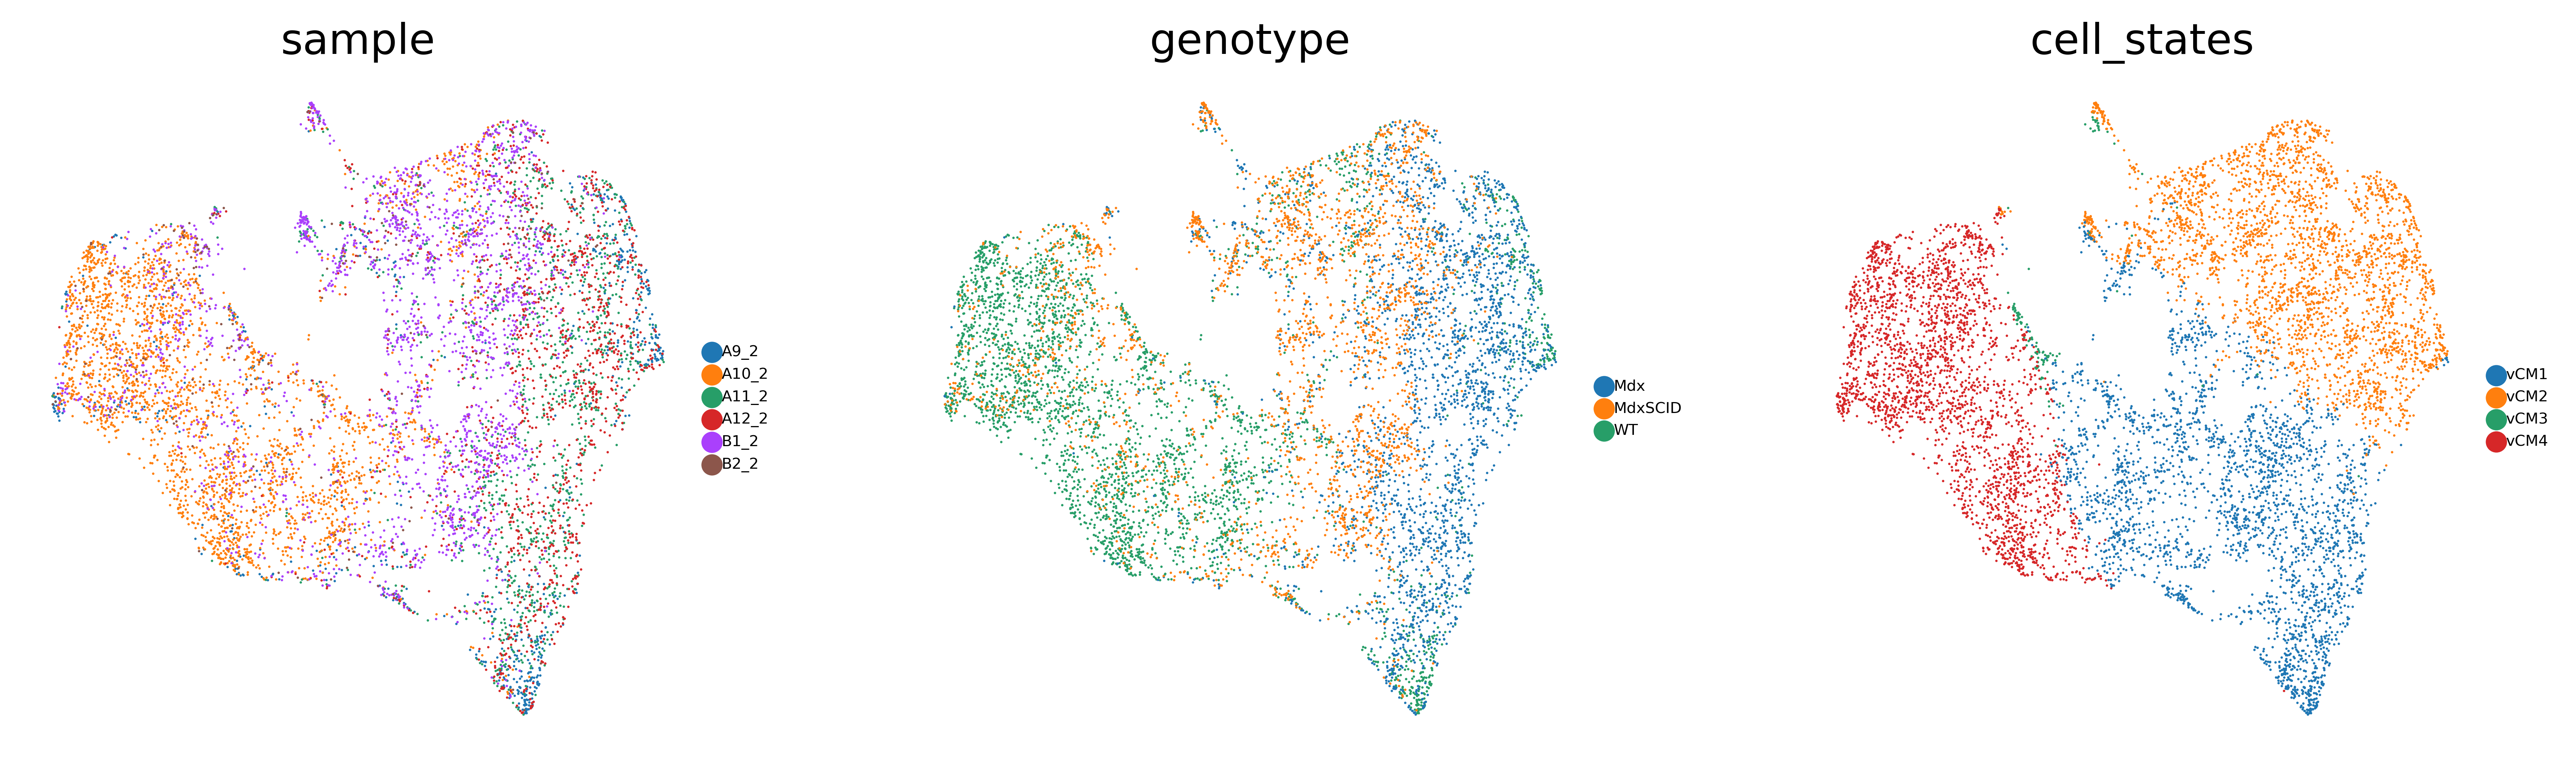

In [7]:
sc.pl.umap(cmc, frameon = False, color = ['sample', 'genotype', 'cell_states'], size = 2.5, legend_fontsize = 5, ncols = 3)

# Gene set scoring

## Interferon gaama signalling

In [8]:
interferon_genes = ['Stat1',
'Ifng',
'Jak1',
'Tyk2',
'Tp53',
'Ifngr1',
'Irf1',
'Jak2',
'Ifngr2',
'Hpx']

In [9]:
sc.tl.score_genes(cmc,
                  gene_list = interferon_genes,
                  score_name = 'interferon_score',
                  random_state = 1712)

computing score 'interferon_score'
    finished: added
    'interferon_score', score of gene set (adata.obs).
    349 total control genes are used. (0:00:00)


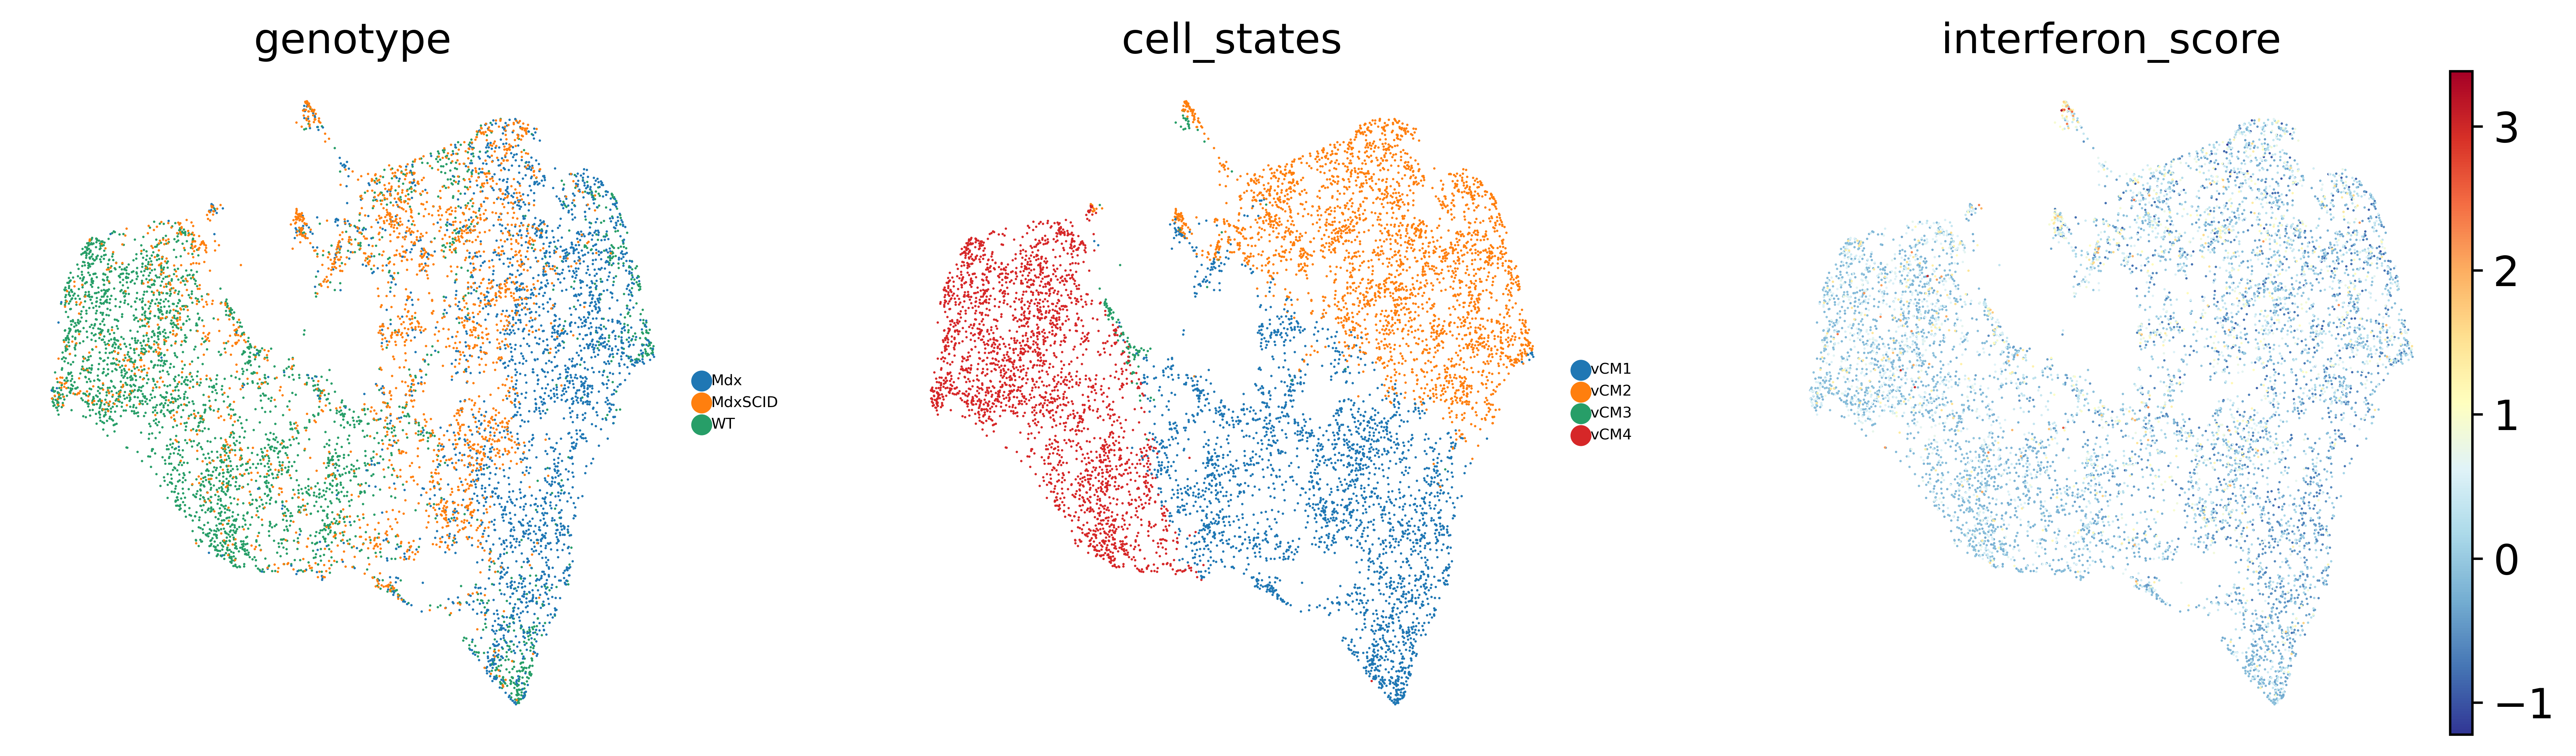

In [10]:
sc.pl.umap(cmc, 
           frameon = False, 
           color = ['genotype', 'cell_states','interferon_score'], 
           size = 2.5, 
           legend_fontsize = 5, 
           ncols = 3,
           cmap = 'RdYlBu_r')

In [11]:
present_interferon = cmc.var.index[cmc.var.index.isin(interferon_genes)]
present_interferon = present_interferon.astype(str)
present_interferon

Index(['Stat1', 'Jak1', 'Hpx', 'Tyk2', 'Ifngr1', 'Ifng', 'Irf1', 'Ifngr2',
       'Jak2'],
      dtype='object')

In [12]:
sc.pl.dotplot(cmc, present_interferon,groupby= 'cell_states',
              dendrogram = True,
              cmap = 'magma', title= 'interferon_cmcs_cell_state', save= 'interferon_cmcs_cell_state.png')

computing PCA
    with n_comps=50


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 32285 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


In [ ]:
sc.pl.dotplot(cmc, present_interferon,groupby= 'genotype',
              dendrogram = True,
              cmap = 'magma',title= 'interferon_cmcs_genotype',save= 'interferon_cmcs_genotype.png')

## Apoptosis

In [ ]:
apoptotic_genes = ['Daxx',
'Col6a3',
'Casp8',
'Gapdh',
'Pfkfb3',
'Tgfb2',
'Pdcl3',
'Snw1',
'Sh3glb1',
'Nradd',
'Clca3a2',
'Diablo',
'Bok',
'Babam2',
'Bcl2l13',
'Egln3',
'Dap3',
'Madd',
'Trp63',
'1600014C10Rik',
'Tfpt',
'Cib1',
'Bcl2l12',
'Trp53',
'Bax',
'Bbc3',
'Ppp1r15a',
'Tmem238l',
'Gm45808',
'Unc5d',
'Bag6',
'Gapdhrt2',
'Elmo3',
'Ppia',
'Birc6',
'Dffb',
'Cflar',
'Stk3',
'Ripk3',
'Bcl2l2',
'Ddit3',
'Bik',
'Tmbim6',
'Tcirg1',
'Sgms1',
'Pmaip1',
'Bad',
'Fas',
'Scml2',
'Zdhhc3',
'Ube4b',
'Casp7',
'Pten',
'Xaf1',
'Rad21',
'Fasl',
'Tnfrsf9',
'Nptx1',
'Bcl2l1',
'Gdf6',
'Rnf186',
'Map3k7',
'Tpx2',
'Casp9',
'Agrn',
'Bmf',
'Birc7',
'Ebf4',
'A5JTV6',
'A6YM30',
'Aifm1',
'Scn2a',
'Tnfrsf25',
'Casp8ap2',
'Trp73',
'Ift57',
'Pde3a',
'Tradd',
'Rrn3',
'Ep300',
'Taok1',
'Rbm25',
'Syce3',
'Ddit4',
'Bcl10',
'Tmf1',
'Cit',
'Gramd4',
'Rps3',
'Slc5a11',
'Tnfaip8',
'Rps27l',
'Bcl2l14',
'Dedd',
'Cidec',
'Pea15a',
'Dnase2a',
'Gm20521',
'Opa1',
'Pdcd10',
'Ciapin1',
'Topaz1',
'Dapk2',
'Rrp8',
'Unc5c',
'Dlc1',
'Fhit',
'Cecr2',
'Ryr2',
'Tgfbr1',
'Coa8',
'Trp53bp2',
'Brat1',
'Bnipl',
'Fgfr3',
'Vdac1',
'Gm29094',
'Syngap1',
'Cdip1',
'Becn1',
'Bak1',
'Prune2',
'Ercc6',
'Il12a',
'Traf7',
'Ppp2r1b',
'Slit2',
'Qrich1',
'Zfp212',
'Apaf1',
'CYCt',
'Senp1',
'Hk2',
'Esr2',
'Angpt1',
'Eya2',
'Stxbp1',
'Endog',
'Mknk1',
'Gzmm',
'Bcl7c',
'Tnfrsf11b',
'Akap1',
'Casp12',
'Casp6',
'Ercc2',
'Birc3',
'Bub1',
'Gcm2',
'Ntn1',
'Gclm',
'Map3k5',
'Atn1',
'Cx3cl1',
'Chek1',
'Xbp1',
'Sema6a',
'Fkbp8',
'C1d',
'Notch2',
'Rabep1',
'Fgf10',
'Bmpr2',
'Axin1',
'C1qbp',
'Tnfrsf18',
'Api5',
'Emp3',
'Dapk3',
'Dffa',
'Csnk2a2',
'Zmat3',
'Tnfsf12',
'Bcl2l11',
'Siva1',
'Bnip2',
'Lgals7',
'Slk',
'Bnip3',
'Snca',
'Dnase1l3',
'Bcl2a1b',
'A1c',
'Bcl2a1d',
'Cd70',
'Birc5',
'Cidea',
'Cideb',
'Gpx4',
'Ppargc1a',
'Sfn',
'Cfdp1',
'Tgfbr3',
'Foxl2',
'Cntfr',
'Dnmt3a',
'Ikbkg',
'Parp2',
'Men1',
'Pglyrp1',
'Pak1',
'Emp2',
'Jtb',
'Cradd',
'Tp63',
'Hipk1',
'Coro1a',
'Abl1',
'Myc',
'Ngf',
'Ins2',
'Ifng',
'Il1a',
'Il3',
'Il2ra',
'Tp53',
'Afp',
'Ada',
'Gzmb',
'Tgfb1',
'Il2',
'Igf1',
'Itgam',
'Jun',
'Krt18',
'Ptprc',
'Enpp1',
'Pim1',
'Tnf',
'Epo',
'Anxa2',
'Il4',
'Hsp90aa1',
'Sod1',
'Il6',
'Nefl',
'Sod2',
'Ptcra',
'Ifi204',
'Rbm10',
'Il7',
'Bcl2',
'Il1b',
'Parp1',
'Gpx1',
'Fgf4',
'Cdk1',
'Dmd',
'Lcn2',
'Krt8',
'Camk2a',
'Agt',
'Gas2',
'Itpr1',
'App',
'Rapsn',
'Nr4a1',
'Pdcd6',
'Gsn',
'Msx1',
'Cd5',
'Rb1',
'Srgn',
'Mecom',
'Anxa6',
'Hmox1',
'Irf1',
'Spn',
'Usp53',
'Lgals1',
'Atf2',
'Hmga1',
'Tgfb3',
'Pou4f1',
'Spi1',
'Gba1',
'Gata1',
'Ccn1',
'Rarg',
'Lsp1',
'Id1',
'Ntf3',
'Prkca',
'Fcer1g',
'Kitlg',
'Bdnf',
'Bmp4',
'Fgfr2',
'Gadd45b',
'Hnf1a',
'Myd88',
'Wt1',
'Rarb',
'Cd3e',
'Wnt4',
'Wnt5a',
'Bmp7',
'Pde6b',
'Pnp',
'Pcgf2',
'Mdm2',
'Cryab',
'Zfp36l1',
'Wnt7a',
'Aldh1a1',
'Cryaa',
'Cd24',
'Tnfrsf1a',
'Tnfrsf1b',
'Nfkb1',
'Bmi1',
'Ctnna1',
'Pik3r1',
'Marcks',
'S100a8',
'Pdia3',
'Lef1',
'Hnf1b',
'Braf',
'Cebpb',
'Wnt7b',
'Col2a1',
'Max',
'Camk2b']

In [ ]:
sc.tl.score_genes(cmc,
                  gene_list = apoptotic_genes,
                  score_name = 'apoptotic_score',
                  random_state = 1712)

In [ ]:
df = cmc.obs[['cell_type', 'apoptotic_score']]

mean_apoptotic_score = df.groupby('cell_type')['apoptotic_score'].mean()
mean_apoptotic_score

In [ ]:
sc.pl.umap(cmc, 
           frameon = False, 
           color = ['genotype', 'cell_states', 'apoptotic_score'], 
           size = 2.5, 
           legend_fontsize = 5, 
           ncols = 3,
           cmap = 'RdYlBu_r')

In [ ]:
present_apoptotic = cmc.var.index[cmc.var.index.isin(apoptotic_genes)]
present_apoptotic = present_apoptotic.astype(str)
present_apoptotic

In [ ]:
expression_matrix = (cmc[:, present_apoptotic].X > 0).toarray()
expression_df = pd.DataFrame(expression_matrix, index=cmc.obs.index, columns=present_apoptotic)
expression_df['cell_states'] = cmc.obs['cell_states'].values

fraction_expressed = expression_df.groupby('cell_states').mean()


genes_above_threshold = (fraction_expressed.max(axis=0) > 0.4)
filtered_apoptotic = present_apoptotic[genes_above_threshold.values]


In [ ]:
sc.pl.dotplot(cmc, filtered_apoptotic ,groupby= 'cell_states',
              dendrogram = True, 
              cmap = 'magma', title = 'apoptotic_cmcs_cell_state',save= 'apoptotic_cmcs_cell_state.png')

In [ ]:
sc.pl.dotplot(cmc, filtered_apoptotic ,groupby= 'genotype', 
              dendrogram = True,
              cmap = 'magma',  title= 'apoptotic_cmcs_genotype',save= 'apoptotic_cmcs_genotype.png')

## Ferroptosis

In [ ]:
ferroptosis_genes = ["Ninj1",
    "Tp53",
    "Hmox1"
    "Gpx4",
    "Slc7a11",
    "Acsl4",
    "Tfrc",
    "Fth1",
    "Ftl",
    "Ncoa4",
    "Lpcat3",
    "Alox15",
    "Ptgs2",
    "Nfe2l2",
    "Cisd1",
    "Sat1",
    "Rsl",
    "Gls2",
    "Dpp4"]

In [ ]:
sc.tl.score_genes(cmc,
                  gene_list = ferroptosis_genes,
                  score_name = 'ferroptosis_score',
                  random_state = 1712)

In [ ]:
sc.pl.umap(cmc, 
           frameon = False, 
           color = ['genotype', 'cell_states','ferroptosis_score'], 
           size = 2.5, 
           legend_fontsize = 5, 
           ncols = 3,
           cmap = 'RdYlBu_r')

In [ ]:
present_ferroptosis = cmc.var.index[cmc.var.index.isin(ferroptosis_genes)]
present_ferroptosis = present_ferroptosis.astype(str)
present_ferroptosis

In [ ]:
sc.pl.dotplot(cmc,present_ferroptosis,groupby= 'cell_states',
              dendrogram = True,
              cmap = 'magma',title = 'ferroptosis_cmcs_cell_state', save= 'ferroptosis_cmcs_cell_state.png')

In [ ]:
sc.pl.dotplot(cmc, present_ferroptosis,groupby= 'genotype',
              dendrogram = True,
              cmap = 'magma', title= 'ferroptosis_cmcs_genotype',save= 'ferroptosis_cmcs_genotype.png')

## Oxidative Phosphorylation

In [ ]:
phosphorylation_genes = ['ND5',
'CYTB',
'ND4',
'ND2',
'COX2',
'ND4L',
'COX1',
'COX3',
'COXI',
'Ndufa7',
'Ndufs1',
'COI',
'Cox5b',
'COXII',
'COXIII',
'Ndufa12',
'Ndufc2',
'Cox7a1',
'Ndufa8',
'Ndufs6',
'Cox8a',
'Sdhaf2',
'Ndufb6',
'Cox4i1',
'Cox8c',
'Proca1',
'Cox7c',
'Co3',
'C0JZQ9',
'C0JZR0',
'Cox7a2l',
'Atp5e',
'Tafazzin',
'Uqcrq',
'Dld',
'Ndufb11',
'Ndufa1',
'Fxn',
'Snca',
'Mt-Cyb',
'Mtco1',
'mt-Co3',
'Mtatp6',
'Mtnd1',
'mt-Nd2',
'mt-Nd3',
'Mtnd4l',
'Mtnd4',
'Mtnd5',
'Mtnd6',
'Ndufb1',
'Cox5a',
'Cox6a2',
'Cox6a1',
'Msh2',
'Cox7a2',
'Cox8b',
'Atp5mf',
'Atp5f1e',
'Cox6b1',
'Cox7b',
'Atp5f1b',
'Bid',
'Atp5pf',
'Coq7',
'Uqcrh',
'Atp5f1a',
'Atp5me',
'mt-Co1',
'Q3TRR5',
'Atp5f1c',
'Uqcr11',
'mt-Nd4',
'Q3UQ68',
'Q3UR21',
'Q3UVI0',
'Uqcc3',
'Afg1l',
'Atp5f1d',
'mt-Nd1',
'Q5BP84',
'Q5BP85',
'Slc25a51',
'Atp5pb',
'Ndufs8',
'Uqcr10',
'Tefm',
'mt-Nd6',
'Q6TM11',
'Q6TM12',
'Q71EJ0',
'Dnajc15',
'Mtch2',
'ATP6',
'Nipsnap2',
'Chchd10',
'Cox6b2',
'Coa6',
'Ndufv3',
'Coq9',
'Sdha',
'Cox4i2',
'Ndufs2',
'Ndufv1',
'Stoml2',
'Ndufa10',
'Ndufs5',
'Ndufa5',
'Cox6c',
'Ndufb2',
'Ndufa2',
'Ndufa3',
'Sdhb',
'Uqcrb',
'Ndufb4',
'Ndufb5',
'Ndufb9',
'Ndufc1',
'Ndufa6',
'Ndufb3',
'Ndufab1',
'Ndufb7',
'Sdhd',
'Ndufs4',
'Uqcrc1',
'Sdhc',
'Cyc1',
'Cox7b2',
'Ndufb8',
'Ndufv2',
'Cox5b-ps',
'Ndufa11',
'Q9D9H8',
'Atp5po',
'Uqcrc2',
'Ndufa9',
'Ndufs7',
'Ndufb10',
'Ndufs3',
'Atp5pd',
'Ndufa13',
'mt-Nd4l',
'mt-Nd5']

In [ ]:
sc.tl.score_genes(cmc,
                  gene_list = phosphorylation_genes,
                  score_name = 'phosphorylation_score',
                  random_state = 1712)

In [ ]:
df = cmc.obs[['cell_type', 'phosphorylation_score']]

mean_phosphorylation_score = df.groupby('cell_type')['phosphorylation_score'].mean()
mean_phosphorylation_score

In [ ]:
sc.pl.umap(cmc, 
           frameon = False, 
           color = [ 'genotype', 'cell_states','phosphorylation_score'], 
           size = 2.5, 
           legend_fontsize = 5, 
           ncols = 3,
           cmap = 'RdYlBu_r')

In [ ]:
present_phosphorylation = cmc.var.index[cmc.var.index.isin(phosphorylation_genes)]
present_phosphorylation = present_phosphorylation.astype(str)
present_phosphorylation

In [ ]:
sc.pl.dotplot(cmc, present_phosphorylation,groupby= 'cell_states',
              dendrogram = True,
              cmap = 'magma',title = 'phosphorylation_cmcs_cell_state', save= 'phosphorylation_cmcs_cell_state.png')

In [ ]:
sc.pl.dotplot(cmc, present_phosphorylation,groupby= 'genotype',
              dendrogram = True,
              cmap = 'magma', title='phosphorylation_cmcs_genotype',save= 'phosphorylation_cmcs_genotype.png')

In [ ]:
sc.pl.umap(cmc, 
           frameon = False, 
           color = ['genotype', 'cell_states','interferon_score','apoptotic_score','ferroptosis_score','phosphorylation_score'], 
           size = 2.5, 
           legend_fontsize = 5, 
           ncols = 3,
           cmap = 'RdYlBu_r')

In [ ]:
cmc

In [ ]:
df = cmc.obs[['cell_states', 'interferon_score', 'apoptotic_score', 'ferroptosis_score','phosphorylation_score']]
mean_cell_states = df.groupby('cell_states').mean()
mean_cell_states

In [ ]:
std_cell_states = df.groupby('cell_states').std()
std_cell_states

In [ ]:
df = cmc.obs[['genotype', 'interferon_score', 'apoptotic_score', 'ferroptosis_score','phosphorylation_score']]
mean_genotype = df.groupby('genotype').mean()
mean_genotype

In [ ]:
std_genotype = df.groupby('genotype').std()
std_genotype

In [ ]:
df = cmc.obs[['genotype', 'cell_states', 'interferon_score', 'apoptotic_score', 'ferroptosis_score', 'phosphorylation_score']]
mean = df.groupby(['cell_states', 'genotype']).mean()
mean

In [ ]:
df = cmc.obs[['genotype', 'cell_states', 'interferon_score', 'apoptotic_score', 'ferroptosis_score', 'phosphorylation_score']]
std = df.groupby(['cell_states', 'genotype']).std()
std